In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [5]:
#순환 신경망
#LSTM 이용 로이터 뉴스 카테고리 분류

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
#num_words 빈도수가 큰 순으로 상위 1000개

In [11]:
#데이터 확인
category = np.max(y_train) +1
print(category, '종류(카테고리)')
print(len(x_train), '학습용 뉴스 기사')
print(len(x_test), '테스트용 뉴스 기사')

46 종류(카테고리)
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사


In [12]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [14]:
#단어의 수 맞춰주기기기

x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [17]:
#원핫 인코딩

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
#모델의 구조를 설정합니다. 

model=Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh')) #LSTM은 tanh를 좋아행~! /// *0* /// 시퀀스 데이터라!
model.add(Dense(46, activation='softmax')) #46개 카테고리별 출력력

#모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

#모델 실행
history=model.fit(x_train, y_train, batch_size=20, epochs=200, validation_data=(x_test, y_test),
          callbacks=[early_stopping_callback])

#테스트 정확도 출력
print('\n 테스트 정확도 : %.4f'%(model.evaluate(x_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 25s 49ms/step - loss: 2.1743 - accuracy: 0.4423 - val_loss: 1.8187 - val_accuracy: 0.5232
Epoch 2/200
450/450 [==============================] - 7s 15ms/step - loss: 1.7690 - accuracy: 0.5423 - val_loss: 1.7567 - val_accuracy: 0.5534
Epoch 3/200
450/450 [==============================] - 6s 13ms/step - loss: 1.6411 - accuracy: 0.5788 - val_loss: 1.7920 - val_accuracy: 0.5681
Epoch 4/200
450/450 [==============================] - 8s 17ms/step - loss: 1.5183 - accuracy: 0.6138 - val_loss: 1.5450 - val_accuracy: 0.6033
Epoch 5/200
450/450 [==============================] - 6s 14ms/step - loss: 1.3666 - accuracy: 0.6516 - val_loss: 1.3993 - val_accuracy: 0.6545
Epoch 6/200
450/450 [==============================] - 6s 14ms/step - loss: 1.2634 - accuracy: 0.6774 - val_loss: 1.3469 - val_accuracy: 0.6647
Epoch 7/200
450/450 [==============================] - 5s 10ms/step - loss: 1.1598 - accuracy: 0.7051 - val_loss: 1.2638 - val_accuracy

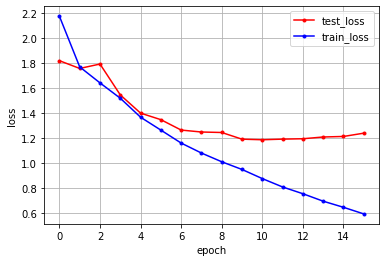

In [22]:
#데이터 시각화

y_vloss=history.history['val_loss']
y_loss=history.history['loss']

#그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
#LSTM / CNN 조합 > 영화 리뷰 분류하기기
#데이터 불러오기
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 2s 0us/step


In [25]:
#단어 수를 맞춰주기

x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [26]:
#모델 구조 설정 

model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1)) #strides 보폭
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()            

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_4 (LSTM)               (None, 55)                26400     
                                                                 
 dense_4 (Dense)             (None, 1)                 56        
                                                      

In [30]:
#모델 실행

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#조기 중단 설정
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=5)

history=model.fit(x_train, y_train, batch_size=40, epochs=200, validation_split=0.25, callbacks=[early_stopping_callback])

#테스트 정확도 출력
print('\n 테스트 정확도: %.4f' %(model.evaluate(x_test, y_test)[1]))

Epoch 1/200
469/469 [==============================] - 47s 93ms/step - loss: 0.0696 - accuracy: 0.9770 - val_loss: 0.4006 - val_accuracy: 0.8782
Epoch 2/200
469/469 [==============================] - 18s 39ms/step - loss: 0.0520 - accuracy: 0.9832 - val_loss: 0.3807 - val_accuracy: 0.8850
Epoch 3/200
469/469 [==============================] - 13s 27ms/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.4254 - val_accuracy: 0.8838
Epoch 4/200
469/469 [==============================] - 10s 22ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.4925 - val_accuracy: 0.8766
Epoch 5/200
469/469 [==============================] - 9s 18ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.4707 - val_accuracy: 0.8846
Epoch 6/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.4669 - val_accuracy: 0.8832
Epoch 7/200
782/782 [==============================] - 5s 6ms/step - loss: 0.5168 - accuracy: 0.8758

 테스트 정확도: 0.8758


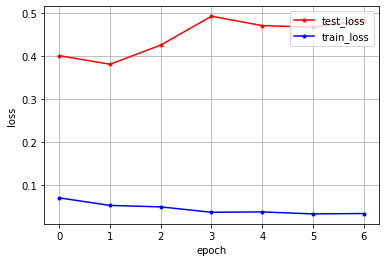

In [31]:
#데이터 시각화

y_vloss=history.history['val_loss']
y_loss=history.history['loss']

#그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [32]:
#어텐션 (attention) 신경망
!pip install attention
from attention import Attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from attention import Attention

In [40]:
#모델 구조 설정 

model = Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
#return_sequences=True >>> 각 시퀀스에서 출력을 해달라는 의미미
#https://tykimos.github.io/2017/04/09/RNN_Getting_Started/
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary() 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_6 (Dropout)         (None, None, 500)         0         
                                                                 
 lstm_8 (LSTM)               (None, None, 64)          144640    
                                                                 
 attention_2 (Attention)     (None, 128)               20480     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
 activation_3 (Activation)   (None, 1)                

In [38]:
model.add(LSTM(64, return_sequences=True))
#모델 실행

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#조기 중단 설정
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=5)

history=model.fit(x_train, y_train, batch_size=40, epochs=200, validation_data=(x_test, y_test), callbacks=[early_stopping_callback])

#테스트 정확도 출력
print('\n 테스트 정확도: %.4f' %(model.evaluate(x_test, y_test)[1]))

Epoch 1/200
625/625 [==============================] - 72s 111ms/step - loss: 0.3669 - accuracy: 0.8339 - val_loss: 0.2774 - val_accuracy: 0.8852
Epoch 2/200
625/625 [==============================] - 39s 63ms/step - loss: 0.2212 - accuracy: 0.9137 - val_loss: 0.2735 - val_accuracy: 0.8870
Epoch 3/200
625/625 [==============================] - 26s 42ms/step - loss: 0.1669 - accuracy: 0.9375 - val_loss: 0.2893 - val_accuracy: 0.8845
Epoch 4/200
625/625 [==============================] - 22s 36ms/step - loss: 0.1222 - accuracy: 0.9554 - val_loss: 0.3634 - val_accuracy: 0.8739
Epoch 5/200
625/625 [==============================] - 23s 37ms/step - loss: 0.0810 - accuracy: 0.9710 - val_loss: 0.3681 - val_accuracy: 0.8772
Epoch 6/200
625/625 [==============================] - 22s 35ms/step - loss: 0.0622 - accuracy: 0.9777 - val_loss: 0.5045 - val_accuracy: 0.8690
Epoch 7/200
782/782 [==============================] - 8s 9ms/step - loss: 0.5820 - accuracy: 0.8674

 테스트 정확도: 0.8674


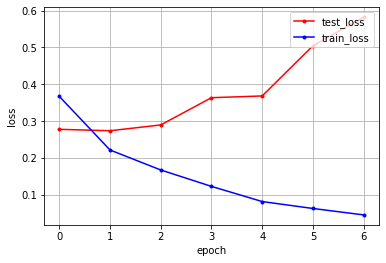

In [39]:
#데이터 시각화

y_vloss=history.history['val_loss']
y_loss=history.history['loss']

#그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()